# Working With Time Series Lesson



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# url
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"

# imporiting url
df = pd.read_csv(url)

# printing df types
print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                261 non-null    object 
 1   coffee_consumption  261 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB
None


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


## pd.to_datetime

    Converts a datatype to datetime.
    

In [3]:
# making 'date' column in df to datetime format

df['date'] = pd.to_datetime(df['date'])

In [4]:
# confirming successful transformation

df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

## .dt

    Accesses the values of the series as datetimelike and return various properties
    Pulls the day, time, etc, from the specified column, ie 
                                                        ```df['date'].dt.day```

In [5]:
# return all of the months

df['date'].dt.day_name()

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4         Monday
         ...    
256    Wednesday
257     Thursday
258       Friday
259       Monday
260      Tuesday
Name: date, Length: 261, dtype: object

In [6]:
# adding day of week column

df['day_of_week'] = df['date'].dt.day_name()
df.head()

,date,coffee_consumption,day_of_week
0,2019-01-01,14.301915,Tuesday
1,2019-01-02,12.905900,Wednesday
2,2019-01-03,10.046015,Thursday
3,2019-01-04,6.354805,Friday
4,2019-01-07,8.545563,Monday


## asfreq, resample
    
    caputuring recurrence of data

In [7]:
# need to move .date_time col into index before using '.asfreq'
# date is now the index

# need to permanantise the reassignation


df = df.set_index('date')
df.head()

,coffee_consumption,day_of_week
date,,
2019-01-01,14.301915,Tuesday
2019-01-02,12.905900,Wednesday
2019-01-03,10.046015,Thursday
2019-01-04,6.354805,Friday
2019-01-07,8.545563,Monday


In [8]:
# to organise the dates sequentially ( = t / f)

df.sort_index(ascending = True)

,coffee_consumption,day_of_week
date,,
2019-01-01,14.301915,Tuesday
2019-01-02,12.905900,Wednesday
2019-01-03,10.046015,Thursday
2019-01-04,6.354805,Friday
2019-01-07,8.545563,Monday
...,...,...
2019-12-25,12.250875,Wednesday
2019-12-26,7.513206,Thursday
2019-12-27,9.464345,Friday


In [9]:
# something related to frequency

fill_df = df.asfreq('D')
fill_df.sample(3)

# this introduces null values bc we told it to have frequency at level of a day (.asfreq('D')).

,coffee_consumption,day_of_week
date,,
2019-11-22,11.184641,Friday
2019-12-21,NaN,NaN
2019-09-03,11.995486,Tuesday


In [10]:
# .resample helps to mitigate the introduction of nulls

df.resample('M').median()
                # .mean(), .min(), .sum(), etc
    
# sum of consumed coffee for each month

,coffee_consumption
date,
2019-01-31,9.429428
2019-02-28,10.264846
2019-03-31,10.784550
2019-04-30,9.662424
2019-05-31,11.130547
2019-06-30,9.059233
2019-07-31,10.790037
2019-08-31,10.123895
2019-09-30,10.098127


In [11]:
# mean of 5-day sets of coffee consumed 

df.resample('5D').mean()

,coffee_consumption
date,
2019-01-01,10.902159
2019-01-06,8.628348
2019-01-11,10.941607
2019-01-16,10.124445
2019-01-21,9.690260
...,...
2019-12-07,10.418495
2019-12-12,11.798295
2019-12-17,9.251785


## forward and back fill

In [12]:
# fill in the nulls that we added

fill_df.sample()

,coffee_consumption,day_of_week
date,,
2019-12-06,9.284118,Friday


In [13]:
# forward fill the nulls

fill_df['forward_fill'] = fill_df['coffee_consumption'].ffill()

fill_df.head()

# .ffill() finds the value preceding the null and fills the null with the preceding value

,coffee_consumption,day_of_week,forward_fill
date,,,
2019-01-01,14.301915,Tuesday,14.301915
2019-01-02,12.905900,Wednesday,12.905900
2019-01-03,10.046015,Thursday,10.046015
2019-01-04,6.354805,Friday,6.354805
2019-01-05,NaN,NaN,6.354805


In [14]:
# backward fill

fill_df['backward_fill'] = fill_df['coffee_consumption'].bfill()
fill_df.head(8)

# could also fill, possibly, with weekly mean, etc

,coffee_consumption,day_of_week,forward_fill,backward_fill
date,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915
2019-01-02,12.905900,Wednesday,12.905900,12.905900
2019-01-03,10.046015,Thursday,10.046015,10.046015
2019-01-04,6.354805,Friday,6.354805,6.354805
2019-01-05,NaN,NaN,6.354805,8.545563
2019-01-06,NaN,NaN,6.354805,8.545563
2019-01-07,8.545563,Monday,8.545563,8.545563
2019-01-08,9.410101,Tuesday,9.410101,9.410101


In [15]:
# fills in misisng days of weeks

fill_df['day_of_week'] = fill_df.index.day_name()
fill_df.head(8)

# didn't have to use .dt bc day_time col already the index and not a col

,coffee_consumption,day_of_week,forward_fill,backward_fill
date,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915
2019-01-02,12.905900,Wednesday,12.905900,12.905900
2019-01-03,10.046015,Thursday,10.046015,10.046015
2019-01-04,6.354805,Friday,6.354805,6.354805
2019-01-05,NaN,Saturday,6.354805,8.545563
2019-01-06,NaN,Sunday,6.354805,8.545563
2019-01-07,8.545563,Monday,8.545563,8.545563
2019-01-08,9.410101,Tuesday,9.410101,9.410101


In [16]:
# or, we could impute a 0 for null weekend values

fill_df['coffee_consumption'] = fill_df['coffee_consumption'].fillna(0)

fill_df.head(8)

,coffee_consumption,day_of_week,forward_fill,backward_fill
date,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915
2019-01-02,12.905900,Wednesday,12.905900,12.905900
2019-01-03,10.046015,Thursday,10.046015,10.046015
2019-01-04,6.354805,Friday,6.354805,6.354805
2019-01-05,0.000000,Saturday,6.354805,8.545563
2019-01-06,0.000000,Sunday,6.354805,8.545563
2019-01-07,8.545563,Monday,8.545563,8.545563
2019-01-08,9.410101,Tuesday,9.410101,9.410101


## plotting

<AxesSubplot:xlabel='date'>

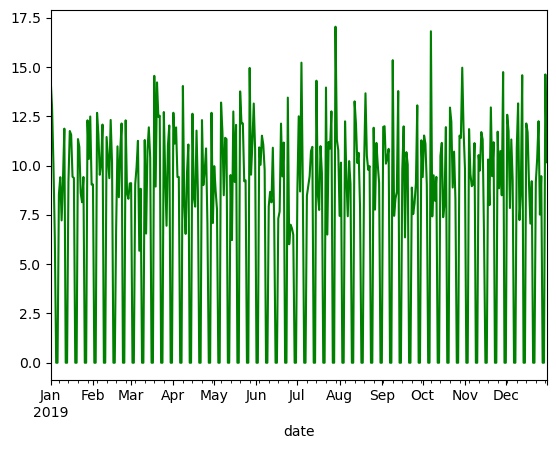

In [17]:
fill_df['coffee_consumption'].plot(c = 'g')

<AxesSubplot:xlabel='date'>

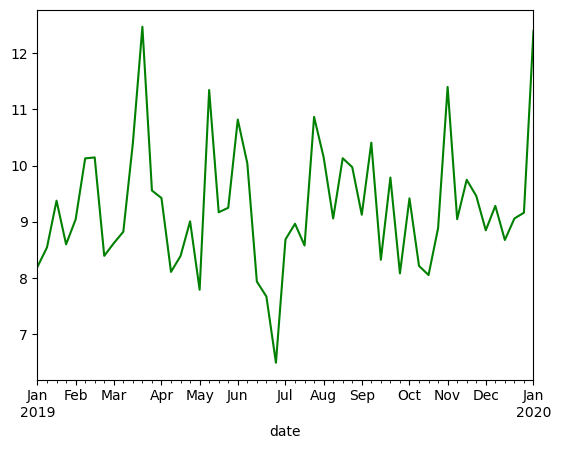

In [18]:
# reducing noise to not graph every day, but, instead, by weekly median

fill_df.resample('W').median()['coffee_consumption'].plot(c = 'g')

<AxesSubplot:xlabel='date'>

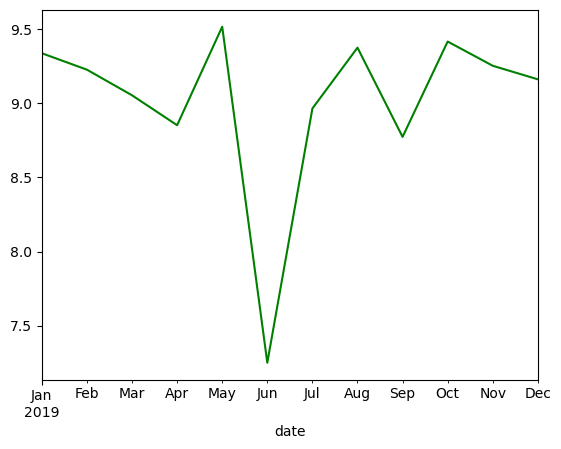

In [19]:
# reducing noise to graph by monthly median

fill_df.resample('m').median()['coffee_consumption'].plot(c = 'g')

## rolling

    rolling average : calculation to analyze data points by creating a series of averages of different subsets of the full data set

In [20]:
fill_df['coffee_consumption_rolling'] = fill_df['coffee_consumption'].rolling(7).mean()

# (how far to roll)
# rolling mean of 7 days
# gives NaN, bc there are no 7-previous-days for the first 6 days

fill_df.head(10)

,coffee_consumption,day_of_week,forward_fill,backward_fill,coffee_consumption_rolling
date,,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915,NaN
2019-01-02,12.905900,Wednesday,12.905900,12.905900,NaN
2019-01-03,10.046015,Thursday,10.046015,10.046015,NaN
2019-01-04,6.354805,Friday,6.354805,6.354805,NaN
2019-01-05,0.000000,Saturday,6.354805,8.545563,NaN
2019-01-06,0.000000,Sunday,6.354805,8.545563,NaN
2019-01-07,8.545563,Monday,8.545563,8.545563,7.450600
2019-01-08,9.410101,Tuesday,9.410101,9.410101,6.751769
2019-01-09,7.219271,Wednesday,7.219271,7.219271,5.939394


In [22]:
fill_df['coffee_consumption'].rolling(3).sum()

date
2019-01-01          NaN
2019-01-02          NaN
2019-01-03    37.253830
2019-01-04    29.306721
2019-01-05    16.400821
                ...    
2019-12-27    29.228426
2019-12-28    16.977551
2019-12-29     9.464345
2019-12-30    14.623106
2019-12-31    24.791422
Freq: D, Name: coffee_consumption, Length: 365, dtype: float64

## strftime : string from-time
    https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [40]:
# string designating what the format will be in 

fill_df.index.strftime('%A %B %Y')

Index(['Tuesday January 2019', 'Wednesday January 2019',
       'Thursday January 2019', 'Friday January 2019', 'Saturday January 2019',
       'Sunday January 2019', 'Monday January 2019', 'Tuesday January 2019',
       'Wednesday January 2019', 'Thursday January 2019',
       ...
       'Sunday December 2019', 'Monday December 2019', 'Tuesday December 2019',
       'Wednesday December 2019', 'Thursday December 2019',
       'Friday December 2019', 'Saturday December 2019',
       'Sunday December 2019', 'Monday December 2019',
       'Tuesday December 2019'],
      dtype='object', name='date', length=365)

## timedeltas

    add and subtract date_time-s

In [33]:
# Timestamps
fill_df.index.min(), fill_df.index.max()

(Timestamp('2019-01-01 00:00:00', freq='D'),
 Timestamp('2019-12-31 00:00:00', freq='D'))

In [32]:
# find the number of days

fill_df.index.max() - fill_df.index.min()

Timedelta('364 days 00:00:00')

## idxmax & idxmin
    
    index of max and index of min value

In [36]:
# day on which coffee consumption at its max

fill_df['coffee_consumption'].idxmax()

Timestamp('2019-07-29 00:00:00', freq='D')

In [37]:
# amount of most coffee consumed in a day

fill_df['coffee_consumption'].max()


17.0434447448351